## Script Geração de Perguntas para miniKGraph.rdf

Data: 28 de maio de 2025

Criador: Laura Parra

Gerar perguntas a partir do Grafo de Conhecimento (PetroKGraph) e criar o contexto relevante para cada pergunta.


In [1]:
import os
import json
import rdflib
import networkx as nx
from node2vec import Node2Vec

c:\Users\lauraparra\AppData\Local\anaconda3\envs\ICA\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **✅ Carregar o PetroKGraph**

In [2]:
from rdflib import Graph, URIRef, Namespace, Literal

g = rdflib.Graph()
# utilizando o novo dataset dado pela Patricia em dezembro 2024
g.parse("C:/Projetos GIT/LangChain/Data/miniKGraph/versao2/miniOntoGeoLogicaInstanciasRelacoes.owl", format="xml") 

G = nx.Graph()

# Añadir nodos y aristas del grafo RDF al grafo de NetworkX
for subj, pred, obj in g:
   
    G.add_edge(str(subj), str(obj), label=str(pred))

### **✅ Verificar Grafo con networkx**

In [3]:
print(f"* * * * * * * * *")
# Numero de nodos, ejes del grafo y grado medio
nodos = G.number_of_nodes()
ejes = G.number_of_edges()
k = ejes*2/nodos
densidad = nx.density(G)
print(f"Grafo con {nodos} nodos, {ejes} ejes, densidad {densidad} y grado medio {k}")

# Grado de los nodos: el número de conexiones de cada nodo
# nx.degree(G)

* * * * * * * * *
Grafo con 9797 nodos, 17276 ejes, densidad 0.00036002387877756765 y grado medio 3.5267939165050524


### ✅ **Consultar o PetroKGraph atualizado para obter informação relevante**

In [9]:
from rdflib import Graph, URIRef, Namespace 

fields = {}
basins = {}
wells  = {}
formations = {}
geological_structures = {}

for s, p, o in g:
    if isinstance(s, URIRef) and "CAMP_CD_CAMPO" in s:
        campo_id = s.split("#")[1]
        if campo_id not in fields:
            fields[campo_id] = {"types": [], "located_in": [], "labels": [], "related": []}
        if "type" in p:
            fields[campo_id]["types"].append(o)
        elif "located_in" in p:
            fields[campo_id]["located_in"].append(o)
        elif "label" in p:
            fields[campo_id]["labels"].append(str(o))
        else:
            fields[campo_id]["related"].append((p, o))

    if isinstance(s, URIRef) and "BASE_CD_BACIA" in s:
        bacia_id = s.split("#")[1]
        if bacia_id not in basins:
            basins[bacia_id] = {"types": [], "labels": []}
        if "type" in p:
            basins[bacia_id]["types"].append(o)
        elif "label" in p:
            basins[bacia_id]["labels"].append(str(o))
            
    if isinstance(s, URIRef) and "POCO_CD_POCO" in s:
        poco_id = s.split("#")[1]
        if poco_id not in wells:
            wells[poco_id] = {"types": [], "located_in": [], "labels": [], "crosses": []}
        if "type" in p:
            wells[poco_id]["types"].append(o)
        elif "located_in" in p:
            wells[poco_id]["located_in"].append(o)
        elif "crosses" in p:
            wells[poco_id]["crosses"].append(str(o))
        elif "label" in p:
            wells[poco_id]["labels"].append(str(o))

    if isinstance(s, URIRef) and "formacao" in s:
        unidade_lito_id = s.split("#")[1]
        if unidade_lito_id not in formations:
            formations[unidade_lito_id] = {"types": [], "located_in": [], "has_age": [], "part_of": [],"carrier_of": [], "constituted_by": [], "crosses": [],  "labels": []}
        if "type" in p:
            formations[unidade_lito_id]["types"].append(o)
        elif "located_in" in p:
            formations[unidade_lito_id]["located_in"].append(str(o))  
        elif "constituted_by" in p:
            formations[unidade_lito_id]["constituted_by"].append(o) 
        elif "has_age" in p:
            formations[unidade_lito_id]["has_age"].append(str(o))  
        elif "part_of" in p:
            formations[unidade_lito_id]["part_of"].append(o)   
        elif "carrier_of" in p:
            formations[unidade_lito_id]["carrier_of"].append(o) 
        elif "crosses" in p:
            formations[unidade_lito_id]["crosses"].append(str(o))
        elif "label" in p:
            formations[unidade_lito_id]["labels"].append(str(o))
          

    if isinstance(s, URIRef) and "grupo" in s:
        unidade_lito_id = s.split("#")[1]
        if unidade_lito_id not in formations:
            formations[unidade_lito_id] = {"types": [], "located_in": [], "has_age": [], "part_of": [],"carrier_of": [], "constituted_by": [], "crosses": [],  "labels": []}
        if "type" in p:
            formations[unidade_lito_id]["types"].append(o)
        elif "located_in" in p:
            formations[unidade_lito_id]["located_in"].append(str(o))  
        elif "constituted_by" in p:
            formations[unidade_lito_id]["constituted_by"].append(o) 
        elif "has_age" in p:
            formations[unidade_lito_id]["has_age"].append(str(o))  
        elif "part_of" in p:
            formations[unidade_lito_id]["part_of"].append(o)  
        elif "carrier_of" in p:
            formations[unidade_lito_id]["carrier_of"].append(o)  
        elif "crosses" in p:
            formations[unidade_lito_id]["crosses"].append(str(o))
        elif "label" in p:
            formations[unidade_lito_id]["labels"].append(str(o))
          

    if isinstance(s, URIRef) and "membro" in s:
        unidade_lito_id = s.split("#")[1]
        if unidade_lito_id not in formations:
            formations[unidade_lito_id] = {"types": [], "located_in": [], "has_age": [], "part_of": [],"carrier_of": [], "constituted_by": [], "crosses": [],  "labels": [] }
        if "type" in p:
            formations[unidade_lito_id]["types"].append(o)
        elif "located_in" in p:
            formations[unidade_lito_id]["located_in"].append(str(o))  
        elif "constituted_by" in p:
            formations[unidade_lito_id]["constituted_by"].append(o) 
        elif "has_age" in p:
            formations[unidade_lito_id]["has_age"].append(str(o))  
        elif "part_of" in p:
            formations[unidade_lito_id]["part_of"].append(o)   
        elif "carrier_of" in p:
            formations[unidade_lito_id]["carrier_of"].append(o) 
        elif "crosses" in p:
            formations[unidade_lito_id]["crosses"].append(str(o))
        elif "label" in p:
            formations[unidade_lito_id]["labels"].append(str(o))
            
    if isinstance(s, URIRef) and "TEFR_CD_TIPO_EST_FISICA" in s:
        estrutura_id = s.split("#")[1]
        partes = estrutura_id.split('_')
        estrutura_fisica_id = '_'.join(partes[:7])
        
        if estrutura_fisica_id not in geological_structures:
            geological_structures[estrutura_fisica_id] = {"types": [], "labels": [] }
        if "type" in p:
            geological_structures[estrutura_fisica_id]["types"].append(o)
        elif "label" in p:
            geological_structures[estrutura_fisica_id]["labels"].append(str(o))
          

In [12]:
# Ordenar los campos y los nombres en orden alfabético
ordered_fields = sorted(fields.items(), key=lambda x: x[0])

for campo_URI, info in ordered_fields:
    # Ordenar los nombres asociados a cada bacia en orden alfabético
    sorted_labels = sorted(info["labels"], key=lambda x: x.upper())
    fields[campo_URI]["labels"] = sorted_labels

for campo_URI, info in fields.items():
    campo_name = info["labels"]
    print(f"Campo: {campo_URI}\n  Nombres: {campo_name}")

Campo: CAMP_CD_CAMPO_0131
  Nombres: ['AZULAO', 'AZULÃO', 'RIO UATUMA']
Campo: CAMP_CD_CAMPO_0572
  Nombres: ['JIRIBATUBA']
Campo: CAMP_CD_CAMPO_0888
  Nombres: ['MANATI', 'ÁREA DO B128']
Campo: CAMP_CD_CAMPO_0109
  Nombres: ['SARDINHA', 'ÁREA DO B097']
Campo: CAMP_CD_CAMPO_0108
  Nombres: ['AREA DO BAS-64', 'ÁREA BAS-064']
Campo: CAMP_CD_CAMPO_0633
  Nombres: ['IGARAPÉ MARIPÁ', 'JAPIIM']
Campo: CAMP_CD_CAMPO_0890
  Nombres: ['CAMARAO NORTE', 'CAMARÃO NORTE', 'ÁREA BAS-131']
Campo: CAMP_CD_CAMPO_0721
  Nombres: ['MORRO DO BARRO']


In [33]:
desired_order = {
    "BASE_CD_BACIA_266": ['BACIA DE CAMAMU-ALMADA', 'ALMADA TERRA', 'CAMAMU TERRA', 'CAMAMU MAR', 'CAMAMU-ALMADA', 'ALMADA MAR'],
    "BASE_CD_BACIA_030": ['BACIA DE AMAZONAS', 'AMAZONAS' ]
}

# Crear una lista ordenada de bacias
ordered_basins = sorted(basins.items(), key=lambda x: list(desired_order.keys()).index(x[0]) if x[0] in desired_order else float('inf'))

# Reorganizar los nombres asociados a cada bacia según el orden deseado
for bacia_URI, info in ordered_basins:
    if bacia_URI in desired_order:
        # Ordenar los nombres según el orden predefinido en desired_order
        sorted_labels = sorted(info["labels"], key=lambda x: desired_order[bacia_URI].index(x.upper()) if x.upper() in desired_order[bacia_URI] else float('inf'))
        basins[bacia_URI]["labels"] = sorted_labels
        
for bacia_URI, info in basins.items():
    bacia_name = info["labels"]
    print(f"Bacia: {bacia_URI}\n  Nombres: {bacia_name}")

Bacia: BASE_CD_BACIA_266
  Nombres: ['BACIA DE CAMAMU-ALMADA', 'ALMADA TERRA', 'CAMAMU TERRA', 'CAMAMU MAR', 'CAMAMU-ALMADA', 'ALMADA MAR']
Bacia: BASE_CD_BACIA_030
  Nombres: ['BACIA DE AMAZONAS', 'AMAZONAS']


In [13]:
print("Basins:", basins.keys())
print("Count Basins:", len(basins.keys()) )
print("* * * " )
print("Fields:", fields.keys())
print("Count Fields:", len(fields.keys()))
print("* * * " )
print("Wells:", wells.keys())
print("Count Wells:", len(wells.keys()))
print("* * * " )
print("Geological Structures:", geological_structures.keys())
print("Count Geological Structures:", len(geological_structures.keys()))
print("* * * " )
print("Formations:", formations.keys())
print("Count Formations:", len(formations.keys()))

Basins: dict_keys(['BASE_CD_BACIA_266', 'BASE_CD_BACIA_030'])
Count Basins: 2
* * * 
Fields: dict_keys(['CAMP_CD_CAMPO_0131', 'CAMP_CD_CAMPO_0572', 'CAMP_CD_CAMPO_0888', 'CAMP_CD_CAMPO_0109', 'CAMP_CD_CAMPO_0108', 'CAMP_CD_CAMPO_0633', 'CAMP_CD_CAMPO_0890', 'CAMP_CD_CAMPO_0721'])
Count Fields: 8
* * * 
Wells: dict_keys(['POCO_CD_POCO_022795', 'POCO_CD_POCO_022452', 'POCO_CD_POCO_023058', 'POCO_CD_POCO_022707', 'POCO_CD_POCO_022735', 'POCO_CD_POCO_022657', 'POCO_CD_POCO_028879', 'POCO_CD_POCO_022485', 'POCO_CD_POCO_023041', 'POCO_CD_POCO_022779', 'POCO_CD_POCO_022699', 'POCO_CD_POCO_023071', 'POCO_CD_POCO_022816', 'POCO_CD_POCO_022881', 'POCO_CD_POCO_022933', 'POCO_CD_POCO_005781', 'POCO_CD_POCO_022885', 'POCO_CD_POCO_022766', 'POCO_CD_POCO_022614', 'POCO_CD_POCO_005656', 'POCO_CD_POCO_022658', 'POCO_CD_POCO_022882', 'POCO_CD_POCO_005661', 'POCO_CD_POCO_005744', 'POCO_CD_POCO_022751', 'POCO_CD_POCO_005940', 'POCO_CD_POCO_022763', 'POCO_CD_POCO_006232', 'POCO_CD_POCO_006204', 'POCO_CD_PO

In [16]:
# Bacias extraídas
for basin, info in basins.items():
        print(f"** ** ** **")
        print(f"  Bacia: {basin}")
        print(f"  Nombres: {info['labels']}")

** ** ** **
  Bacia: BASE_CD_BACIA_266
  Nombres: ['ALMADA MAR', 'CAMAMU MAR', 'BACIA DE CAMAMU-ALMADA', 'ALMADA TERRA', 'CAMAMU-ALMADA', 'CAMAMU TERRA']
** ** ** **
  Bacia: BASE_CD_BACIA_030
  Nombres: ['AMAZONAS', 'BACIA DE AMAZONAS']


In [17]:
# Poços extraídos
counter = 0
for well, info in wells.items():
    counter += 1
    print(f"Poço: {well}")
    #print(f"  Tipos: {info['types']}")
    
    localizacion = info['located_in']
    nombres_bacia = [obtener_nombre_bacia(uri) for uri in localizacion]
    print(f"  Nombre del poço: {info['labels']},  Localizado na bacia: {nombres_bacia}")

# Poços extraídos
print(f"Total de poços: {counter}")

Poço: POCO_CD_POCO_022795
  Nombre del poço: ['9FZ-0018-AM', 'FZ-18-AM', '9-FZ-0018-AM', '9-FZ-18-AM', '9-FZ-18', '9FZ18AM', '9FZ-18-AM', '9FZ18', 'FZ-18', '9FZ0018AM'],  Localizado na bacia: [['AMAZONAS', 'BACIA DE AMAZONAS']]
Poço: POCO_CD_POCO_022452
  Nombre del poço: ['3ICA2', '3ICA-0002-AM', '3ICA-2-AM', '3-ICA-0002-AM', '3-ICA-2', '3ICA2AM', '3-ICA-2-AM', '3ICA0002AM', 'ICA-2-AM', 'ICA-2'],  Localizado na bacia: [['AMAZONAS', 'BACIA DE AMAZONAS']]
Poço: POCO_CD_POCO_023058
  Nombre del poço: ['2-OAST-1-PA', '2OAST-0001-PA', '2-OAST-1', '2OAST-1-PA', 'OAST-1', '2OAST0001PA', 'OAST-1-PA', '2OAST1', '2OAST1PA', '2-OAST-0001-PA'],  Localizado na bacia: [['AMAZONAS', 'BACIA DE AMAZONAS']]
Poço: POCO_CD_POCO_022707
  Nombre del poço: ['2CPST0002PA', '2-CPST-2-PA', '2-CPST-0002-PA', '2CPST-0002-PA', 'CPST-2', '2-CPST-2', '2CPST-2-PA', '2CPST2', '2CPST2PA', 'CPST-2-PA'],  Localizado na bacia: [['AMAZONAS', 'BACIA DE AMAZONAS']]
Poço: POCO_CD_POCO_022735
  Nombre del poço: ['FZ-24', '9FZ

####  ✅  **Visualização do grafo**

Usando [WebVOWL](https://service.tib.eu/webvowl/) pode ser possivel visualizar cada nó no grafo.

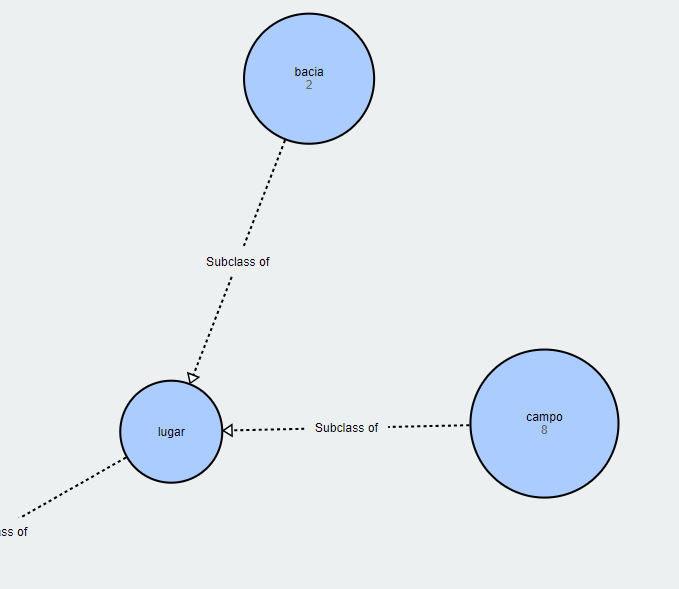

### 🔎 **Gerar as perguntas baseado no miniKGraph** 

In [ ]:
namespace_base = rdflib.Namespace("http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")
rdf= Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
import uuid

def gerar_perguntas(g):
    questions = []
    id_counter = 0  # Contador para los IDs de las preguntas
                
# ******** PERGUNTAS SOBRES OS NOMES RELACIONADOS NOS LABELS ******** 

    for bacia_URI, info in basins.items():
        
        if info["labels"]:
            basins_names = []
            
            for bacia_name in g.objects(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{bacia_URI}"), rdfs.label):
                bas = str(bacia_name).title()
                basins_names.append(str(bas))
                
            if basins_names:
                all_names_basin = ", ou ".join(basins_names)
                id_counter += 1
                questions.append({
                    "id": id_counter,
                    "level": 0,
                    "question": f"Qual é o nome da bacia {bacia_URI}?",
                    "answer": basins_names,
                    "context": f"O nome da bacia {bacia_URI} é {all_names_basin}."
                })  

    for campo, info in fields.items():
        if info["labels"]:
            fields_names = []

            for campo_name in g.objects(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{campo}"), rdfs.label):
                camp = str(campo_name).title()
                fields_names.append(str(camp))

            if fields_names:
                all_fields_names = ", ou ".join(fields_names)
                id_counter += 1

                questions.append({
                    "id": id_counter,
                    "level": 0,
                    "question": f"Qual é o nome do campo {campo}?",
                    "answer": fields_names,
                    "context": f"O nome do campo {campo} é {all_fields_names}."
                })

    for formacoes, info in formations.items():
        if info["labels"]:
            all_names = []

            for formacao_name in g.objects(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{formacoes}"), rdfs.label):
                all_names.append(str(formacao_name))

            if formacoes.startswith('formacao'):
                all_names_ = ", ou ".join(all_names)
                id_counter += 1
                questions.append({
                    "id": id_counter,
                    "level": 0,
                    "question": f"Qual é o nome da {formacoes}?", # nome da formação 
                    "answer": all_names,
                    "context": f"O nome da formação {formacoes} é {all_names_}."
                })  

                
# ******** ******** ******** ******** ******** ******** ******** 
  
    for campo, info in fields.items():
        if info["located_in"]:
            location = info["located_in"][0].split("#")[1]
            campoID= campo
            
            campo_name = info["labels"][0] if info["labels"] else campo
            location_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{location}"), rdfs.label).title()

            all_campo_names = []
            for campo_name in g.objects(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{campo}"), rdfs.label):
                all_campo_names.append(str(campo_name))
            

            if all_campo_names:
                all_names = ", ou ".join(all_campo_names)
                id_counter += 1
                questions.append({
                    "id": id_counter,
                    "level": 1,
                    "question": f"Em que bacia está localizado o campo {campo_name.title()} de ID {campoID}?",
                    "answer": str(location_name),
                    "context": f"O campo {campo_name} ({campoID}) está localizado na bacia {location_name}."
                })
                
                
            
 # ******** ******** ******** ******** ******** ******** ********                
    total_pozos = 0
    for well, info in wells.items():
        total_pozos += 1
        if info["located_in"]:
            location = info["located_in"][0].split("#")[1]
            well_ID = well
            
            well_name = info["labels"][0] if info["labels"] else well
            location_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{location}"), rdfs.label).title()
           
            if location.startswith('BASE'):
                id_counter += 1
                questions.append({
                    "id": id_counter,
                    "level": 1,
                    "question": f"Em que BACIA está localizado o poço {well_name} de ID {well_ID}?",
                    "answer": str(location_name),
                    "context": f"O poço {well_name} ({well_ID}) está localizado na bacia {location_name} de URI {location} ."
                })
                
     
# ******** ******** ******** ******** ******** ******** ******** 

    for formacoes, info in formations.items():
        if info["part_of"]:
            part_of = info["part_of"][0].split("#")[1]
            formation_name = info["labels"][0] if info["labels"] else formacoes
            part_of_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{part_of}"), rdfs.label)
            id_counter += 1
            questions.append({
                "id": id_counter,
                "question": f"Qual é a entidade que faz parte de {formation_name}?",
                "answer": str(part_of_name),
                "context": f"A formação/grupo/membro {formation_name} faz parte de {part_of_name}."
            })

    for formacoes, info in formations.items():
            
            if info["located_in"]:
                location = info["located_in"][0].split("#")[1]
                if location != "basin" : 
                    formation_name = info["labels"][0] if info["labels"] else formacoes
                    location_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{location}"), rdfs.label).title()
                    id_counter += 1

                    questions.append({
                        "id": id_counter,
                        "question": f"Qual é a localização de {formation_name}?",
                        "answer": str(location_name),
                        "context": f"A {formation_name} ({formacoes}) está localizada na bacia {location_name}."
                    })
                
# ******** ******** ******** ******** ******** ******** ******** 

    for formacoes, info in formations.items():
        if info["constituted_by"]:
            constituted_by_names = []
            formation_name = info["labels"][0] if info["labels"] else formacoes

            for material in info["constituted_by"]:
                material_id = material.split("#")[1]
                #print(material_id)
                material_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{material_id}"), rdfs.label)
                #print(material_name)
                if material_name:
                    constituted_by_names.append(str(material_name))
        
            if constituted_by_names:
                constituted_by_materials = ", ".join(constituted_by_names)
                id_counter += 1

                

                questions.append({
                    "id": id_counter,
                    "question": f"Qual é o material da terra que está constituida a {formation_name}?",
                    "answer": constituted_by_names,
                    "context": f"A {formation_name} ({formacoes}) está constituida por {constituted_by_materials}."
                })
                
# ******** ******** ******** ******** ******** ******** ******** 

    for formacoes, info in formations.items():
        if info["has_age"]:
            age_list_names = []
            formation_name = info["labels"][0] if info["labels"] else formacoes

            for has_age in info["has_age"]:
                has_age_URI = has_age.split("#")[1]
                has_age_URI_ = has_age.split('_')
                URI='_'.join(has_age_URI_[-2:])
                #print(has_age_URI)
                has_age_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{has_age_URI}"), rdfs.label)
                #print(has_age_name)
                for has_age_name in g.objects(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{has_age_URI}"), rdfs.label):
                        age_list_names.append(str(has_age_name.title()))


            if age_list_names:
                all_names_age = ", ".join(age_list_names)
                id_counter += 1
                questions.append({
                    "id": id_counter,   
                    "question": f"Qual é a idade geológica de {formation_name} de URI {URI.title()}?",
                    "answer": age_list_names,
                    "context": f"A idade geológica de {formation_name} de URI {URI.title()} é {all_names_age.title()}."
                })
                
                
# ******** ******** ******** ******** ******** ******** ******** 
           
    for formacoes, info in formations.items():
        if info["carrier_of"]:
            carrier_of_names = []
            
            formation_name = info["labels"][0] if info["labels"] else formacoes

            for carrier_of in info["carrier_of"]:
                carrier_of_URI = carrier_of.split("#")[1]
                carrier_of_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{carrier_of_URI}"), rdfs.label).lower()

                for carrier_of_name in g.objects(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{carrier_of_URI}"), rdfs.label):
                        carrier_of_names.append(str(carrier_of_name.lower()))

            if carrier_of_names:
                all_names_carrier_of = ", ".join(carrier_of_names)
                id_counter += 1
                questions.append({
                        "id": id_counter,
                        "question": f"Que ESTRUTURA GEOLÓGICAS são apresentadas pela {formation_name} de URI {formacoes}?",
                        "answer": carrier_of_names,
                        "context": f"A {formation_name} de URI {formacoes} apresenta as seguintes ESTRUTURA GEOLÓGICAS: {all_names_carrier_of.lower()}."
                    })
                
# ******** ******** ******** ******** ******** ******** ********     
    query = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX ont: <http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#>

    SELECT ?field ?well (COUNT(?well) as ?pozos) (GROUP_CONCAT((?wellName); separator=", ") as ?wellNames) (GROUP_CONCAT(?well; separator=", ") as ?wellURIs)
    WHERE {
        ?well rdf:type ont:well .
        ?field rdf:type ont:field .
        ?well ont:located_in ?field .
        {
            SELECT ?well (SAMPLE(?name) AS ?wellName)
            WHERE {
            ?well rdfs:label ?name .
            }
            GROUP BY ?well
        }
    }
    GROUP BY ?field
    """

    results = g.query(query)
    fields_data = []   
    for row in results:
        campo_uri = row.field
        pozos = row.pozos
        wellNames = row.wellNames
        
        
        fieldURI = campo_uri.split("#")[1]
        
        count = row.pozos.toPython()
        campo_name = g.value(campo_uri, rdfs.label)
        
        wellNames = str(row.wellNames).split(", ")
        field_data = {
            "field": fieldURI,
            "pozos": pozos,
            "wellNames": wellNames
        }
        fields_data.append(field_data)

        # print(f"Field: {field_data['field']}, Pozos: {field_data['pozos']}, Well Names: {field_data['wellNames']}")
        id_counter += 1    
        wellNames_list = ", ".join(wellNames)     
        questions.append({
            "id": id_counter,
            "question": f"Quantos POCOS estão localizados no CAMPO de URI {fieldURI} ({campo_name})?",
            "answer": str(count),
            "context": f"No campo de URI {fieldURI} ({campo_name}) estão localizados no total {count} poços: {wellNames_list}."
        })
        

# ******** ******** ******** ******** ******** ******** ********   
    query2 = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX ont: <http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#>

    SELECT ?basin
    WHERE {
        ?basin rdf:type ont:basin .
        ?lithostratigraphic_unit rdf:type ont:lithostratigraphic_unit .
        ?lithostratigraphic_unit ont:_id "formacao_320" .
        ?well ont:crosses ?lithostratigraphic_unit .
        ?well ont:located_in ?basin .
     
        }
    """
    results2 = g.query(query2)

    for row in results2:
        basin_uri = row.basin
        basin_name = g.value(basin_uri, rdfs.label)
        print(basin_name)
        id_counter += 1         
        questions.append({
            "id": id_counter,
            "question": f"Em que BACIA o poço atravessa a formação 320?",
            "answer": str(basin_name),
            "context": f"O poço atravessa a formação 320 na bacia {basin_name}."
        })

# ************ ********** ******* *********** ******* **********
    count_campos = {}
    campos_por_bacia = {}
    campos_por_bacia_URI = {}
    for campo, info in fields.items():
        if info["located_in"]:
            
            location = info["located_in"][0].split("#")[1]
            bacia_URI = location
            location_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{location}"), rdfs.label).title()
            campo_nome = info["labels"][0].title() if info["labels"] else campo
            if location_name not in count_campos:
                count_campos[location_name] = 0
            count_campos[location_name] += 1

            if location_name not in campos_por_bacia:
                campos_por_bacia[location_name] = []
            campos_por_bacia[location_name].append(campo_nome)

            if location not in campos_por_bacia_URI:
                campos_por_bacia_URI[location] = []
            campos_por_bacia_URI[location].append(campo)

                  
    for bacia, count in count_campos.items():
        id_counter += 1         
        questions.append({
            "id": id_counter,
            "question": f"Quantos campos estão localizados na bacia {bacia} de URI {bacia_URI}?",
            "answer": str(count),
            "context": f"Existem {count} campos localizados na bacia {bacia}."
        })
        
    for bacia, campos in campos_por_bacia.items():
        campos_list_ = ", ".join(campos)
        campos_list = [str(campo) for campo in campos]
        id_counter += 1         
        questions.append({
            "id": id_counter,
            "question": f"Quais CAMPOS estão localizados na bacia {bacia} de URI {bacia_URI}?",
            "answer": campos_list,
            "context": f"Na bacia {bacia} de URI {bacia_URI} existem {len(campos)} campos: {campos_list_}."
    })
    
    for bacia_URI, campos in campos_por_bacia_URI.items():
        
        camposURI_list_ = ", ".join(campos)
        camposURI_list = [str(campo) for campo in campos]
        id_counter += 1         
        questions.append({
            "id": id_counter,
            "question": f"Quais CAMPOS estão localizados na bacia {bacia_URI}?",
            "answer": camposURI_list,
            "context": f"Na bacia {bacia} de URI {bacia_URI} existem {len(campos)} campos: {camposURI_list_}."
    })


 # ******** **************** ************ ********** **********   
    count_wells = {}
    poco_por_bacia = {}
    for well, info in wells.items():
        if info["located_in"] :
            location = info["located_in"][0].split("#")[1]
            well_URI = well
            well_name = info["labels"][0] if info["labels"] else well
            if location.startswith('BASE_CD_BACIA'): 
                location_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{location}"), rdfs.label).title()
                #print(f"Location well: {location}")
                if location_name not in count_wells:
                    count_wells[location_name] = 0

                count_wells[location_name] += 1

                if location_name not in poco_por_bacia:
                    poco_por_bacia[location_name] = []
                poco_por_bacia[location_name].append(well_name)

            #print(f"Location well: {poco_por_bacia}")
            
    if count_wells:
        for bacia, count in count_wells.items():
                    id_counter += 1         
                    questions.append({
                        "id": id_counter,
                        "question": f"Quantos poços estão localizados na bacia {bacia}?",
                        "answer": str(count),
                        "context": f"**Existem {count} poços localizados na bacia {bacia}."
                    })

    for bacia, pozos in poco_por_bacia.items():
        pozos_list_ = ", ".join(pozos)
        pozos_list = [str(pozo) for pozo in pozos]
        bacia_URI = location
        id_counter += 1         
        questions.append({
            "id": id_counter,
            "question": f"Quais poço estão localizados na bacia {bacia}?",
            "answer": pozos_list,
            "context": f"Na bacia {bacia} de ID {bacia_URI} existem {len(pozos)} poços: {pozos_list_}."
        })

 # ******** **************** ************ ********** **********  
    
    for well_URI, info in wells.items():
        litog_names = []
        litog_URIs = []
        if info["crosses"]:
            well_name = info["labels"][0] if info["labels"] else well_URI  # Obtiene el nombre del pozo

            for cross in info["crosses"]:
                litog_URI = cross.split("#")[1]
                litog_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{litog_URI}"), rdfs.label)

                if litog_name: litog_names.append(str(litog_name))

                if litog_URI:  litog_URIs.append(str(litog_URI))

            if litog_names:
                all_litog_names = ", ".join(litog_names)
                id_counter += 1
        
                questions.append({
                    "id": id_counter,
                    "question": f"Que unidades litoestratigráficas o poço {well_name} atravessa?",
                    "answer": litog_names,
                    "context": f"O poço de URI {well_URI} ({well_name}) atravessa as seguintes unidades litoestratigráficas: {all_litog_names}."  })
            
            if litog_URIs:
                all_litog_URIs = ", ".join(litog_URIs)
                id_counter += 1
        
                questions.append({
                    "id": id_counter,
                    "question": f"Que unidades litoestratigráficas o poço {well_URI} atravessa?",
                    "answer": litog_URIs,
                    "context": f"O poço de URI {well_URI} ({well_name}) atravessa as seguintes unidades litoestratigráficas: {all_litog_URIs}."   })

# ******** ******** ******** ******** ******** ******** ******* 
# ********* materials_to_formations[material_name] ************
# ******** ******** ******** ******** ******** ******** ******* 

    materials_to_formations = {}
    for formacoes, info in formations.items():
        
        if info["constituted_by"]:
            
            formation_name = info["labels"][0] if info["labels"] else formacoes

            for material in info["constituted_by"]:
                material_id = material.split("#")[1]
                material_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{material_id}"), rdfs.label)
                material_name = str(material_name)
                
                if material_name not in materials_to_formations:
                        materials_to_formations[material_name] = []

                materials_to_formations[material_name].append(formation_name)
            
                
    for material_name, formation_name in materials_to_formations.items():

        all_forma_names = ", ".join(formation_name)
        formations_list = [str(formacao) for formacao in formation_name]
        id_counter += 1
        
        questions.append({
            "id": id_counter,
            "level": 1,
            "question": f"Que unidades litoestratigráficas são constituídas por {material_name}?",
            "answer": formations_list,
            "context": f"As unidades litoestratigráficas constituídas por {material_name} são: {all_forma_names}."
         }) 
# ******** ******** ******** *********** ******* ******** ******** ********             
# ******** ******** ******** MULTI - HOP ******* ******** ******** ******** 
# PERGUNTA # 1 - MULTI-HOP
# P: Que UNIDADES LITOESTRATIGRÁFICAS o POCO atravessa que são constituídas por ROCHAS do MATERIAL DA TERRA?

    query3 = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX ont: <http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#>
                 

    SELECT ?well ?dolomite ?lithostratigraphic_unit (GROUP_CONCAT(DISTINCT ?lithostratigraphic_unit; separator=", ") AS ?lithostratigraphic_units) 
    
    WHERE {
            ?well rdf:type ont:well .
            ?dolomite rdf:type ont:dolomite .
            ?lithostratigraphic_unit rdf:type ont:lithostratigraphic_unit .
            
            ?well ont:crosses ?lithostratigraphic_unit .
            ?lithostratigraphic_unit ont:constituted_by ?dolomite .
        
            }
    
    GROUP BY ?well

    
    """ 
       

    results3 = g.query(query3)
    
    
    for row in results3:
        lithostratigraphic_units = row.lithostratigraphic_units
        
        well = row.well
        well_URI = well.split("#")[1]
        well_name = g.value(well, rdfs.label)       
        
        lithostratigraphic_units_names = []
        for lithostratigraphic_unit in lithostratigraphic_units.split(", "):
            lithostratigraphic_unit_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{lithostratigraphic_unit}"), rdfs.label)
            
            if lithostratigraphic_unit_name is not None:
                lithostratigraphic_units_names.append(lithostratigraphic_unit_name)
            else:
                lithostratigraphic_units_names.append(lithostratigraphic_unit.split("#")[1])  # Usamos la parte después del #
        
        if lithostratigraphic_units_names:
            lithostratigraphic_units_str = ", ".join(lithostratigraphic_units_names)

            #print(f"Lithostratigraphic Unit: {lithostratigraphic_units_str}, Well: {well_URI}")
            id_counter += 1
            
            questions.append({
                "id": id_counter,
                "level": 2,
                "question": f"Que UNIDADES LITOESTRATIGRÁFICAS o poço {well_name} de URI {well_URI} atravessa que são constituídas por ROCHAS do tipo dolomito?",
                "answer": lithostratigraphic_units_names,
                "context": f"O poço {well_name} de URI {well_URI} atravessa as seguintes unidades litoestratigráficas que são constituídas por rochas do material da terra: {lithostratigraphic_units_str}."
            })

# ******** ******** MULTI - HOP ******** ******** ******** ******** ********
# PERGUNTA # 2 - MULTI-HOP
# Que UNIDADES LITOESTRATIGRÁFICAS o POCO atravessa que são constituídas por FLUIDO do tipo gás seco

    for well_URI, well_info in wells.items():
        if well_info["crosses"]:
            well_name = well_info["labels"][0] if well_info["labels"] else well_URI  # Nombre del pozo

            # Diccionario para almacenar las formaciones cruzadas por material
            materials_to_crossed_formations = {}

            for cross in well_info["crosses"]:
                litog_URI = cross.split("#")[1]
                #litog_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{litog_URI}"), rdfs.label)
                #litog_name = str(litog_name) if litog_name else None

                if litog_URI:
                    # Buscar el material asociado a esta unidad litoestratigráfica
                    for formacoes, info in formations.items():
                        formation_name =  formacoes
                        
                        if formation_name == litog_URI and info["constituted_by"]:
                            for material in info["constituted_by"]:
                                material_id = material.split("#")[1]
                                material_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{material_id}"), rdfs.label)
                                material_name = str(material_name)

                                # Agregar la formación al material correspondiente
                                if material_name not in materials_to_crossed_formations:
                                    materials_to_crossed_formations[material_name] = []

                                if litog_URI not in materials_to_crossed_formations[material_name]:
                                    materials_to_crossed_formations[material_name].append(litog_URI)
                                

            # Generar preguntas para cada material con sus formaciones cruzadas
            for material_name, crossed_formations in materials_to_crossed_formations.items():
                crossed_formations_names = []
                for crossed_formation in crossed_formations:
                    crossed_formation_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{crossed_formation}"), rdfs.label)
                    crossed_formations_names.append(str(crossed_formation_name) if crossed_formation_name else crossed_formation.split("#")[1])

                all_crossed_formations_names = ", ".join(crossed_formations_names)
                all_crossed_formations = ", ".join(sorted(crossed_formations))
                id_counter += 1
                
                             
                questions.append({
                    "id": id_counter,
                    "level": 2,
                    "question": f"Que UNIDADES LITOESTRATIGRÁFICAS o poço {well_name} de URI {well_URI} atravessa que são constituídas por MATERIAL do tipo {material_name}?",
                    "answer": crossed_formations,
                    "context": f"O poço {well_name} de URI {well_URI} atravessa as seguintes unidades litoestratigráficas constituídas pelo MATERIAL do tipo {material_name}: {all_crossed_formations} ({all_crossed_formations_names})."
                })  
    
    
 
# ******** ******** MULTI - HOP ******** ******** ******** ******** ********
# PERGUNTA # 3 - MULTI-HOP
# Que IDADE GEOLÓGICA das UNIDADES LITOESTRATIGRÁFICAS constituídas por FLUIDO do tipo gás seco / dry_gas?
    # en la primera parte materials_to_formations
    # en la segunda parte formations "has_age" 

    for material_name, formations_list in materials_to_formations.items():
        combined_formations = []
        combined_ages = set()
        for formation in formations_list:
            
            for key in formations.keys():
                if formation in formations[key]["labels"]:
                    formation_info = formations[key]
                    if formation_info["has_age"]:
                        

                        for has_age in formation_info["has_age"]:
                            has_age_URI = has_age.split("#")[1]
                            has_age_name = g.value(URIRef(has_age), rdfs.label)

                            if has_age_name not in combined_ages:
                                combined_formations.append(str(formation))
                                combined_ages.add(str(has_age_name))
                            
        # print(f"Material: {material_name}, Formação: {all_formations}, Idades: {all_ages}")
        if combined_formations and combined_ages:
            all_formations = ", ".join(combined_formations)
            all_ages = ", ".join(sorted(combined_ages))
            combined_ages_list = list(sorted(combined_ages))
            id_counter += 1
            questions.append({
                "id": id_counter,
                "level": 2,
                "question": f"Qual é a idade geológica das unidades litoestratigráficas constituídas ppelo material do tipo {material_name}?",
                "answer": combined_ages_list,
                "context": f"A idade geológica das formações {all_formations} constituídas por material do tipo {material_name} é {all_ages}."
            })
   
# ******** ******** ******** MULTI - HOP ******** ******** ******** ******** ********
# PERGUNTA # 4 - MULTI-HOP   
# ***********************************************************************************
# Quantos POÇOS atravessam UNIDADES LITOESTRATIGRÁFICAS constituídas por MATERIAL do tipo {material}?"

    def remove_suffix(material):
        if '_formacao_' in material:
            return material.split('_formacao_')[0]
        elif '_membro_' in material:
            return material.split('_membro_')[0]
        elif '_grupo_' in material:
            return material.split('_grupo_')[0]
        else:
            return material
    
    materials_to_formations = {}
    for formacoes, info in formations.items():
        
        if info["constituted_by"]:
            formation_URI = formacoes
            
            for material in info["constituted_by"]:
                
                material_id = material.split("#")[1]
                material_ID = remove_suffix(material_id).strip()
                #print(f"Material ID: {material_ID}")
                                               
                if material_ID not in materials_to_formations:
                        materials_to_formations[material_ID] = []

                if formation_URI not in materials_to_formations[material_ID]:
                     materials_to_formations[material_ID].append(formation_URI)
    
    sorted_materials_to_formations = dict(sorted(materials_to_formations.items(),key=lambda x: x[0] ))

    # Inicializa un diccionario de conjuntos para contar pozos por material
    pozos_per_material = {material: set() for material in sorted_materials_to_formations}

    for material, formations_list in sorted_materials_to_formations.items():
        for well_URI, well_info in wells.items():
            if well_info.get("crosses"):
                for cross in well_info["crosses"]:
                    lithostratigraphic_unit = cross.split("#")[1]
                    
                    if lithostratigraphic_unit and lithostratigraphic_unit in formations_list:
                        # Añadir el pozo al conjunto correspondiente
                        pozos_per_material[material].add(well_URI)

    # Contar el número de pozos para cada material
    count_pozos_per_material = {material: len(pozos) for material, pozos in pozos_per_material.items()}

    # Imprimir los resultados
    for material, count in count_pozos_per_material.items():
        id_counter += 1

        material = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{material}"), rdfs.label)
        
        questions.append({
            "id": id_counter,
            "level": 2,
            "question": f"Quantos poços atravessam unidades litoestratigráficas constituídas por material do tipo {material}?",
            "answer": str(count),
            "context": f"Existem {count} poços que atravessam unidades litoestratigráficas constituídas por material do tipo {material}."
        })

# ******** ******** MULTI - HOP ******** ******** ******** ******** ********
# PERGUNTA # 5 - MULTI-HOP
#  ***************************************************************************************
# Em quais BACIAS estão as UNIDADES LITOESTRATIGRÁFICAS constituídas por FLUIDO do tipo gás seco / dry_gas?
    materials_to_formations = {}
    for formacoes, info in formations.items():

        if info["constituted_by"]:

            formation_name = info["labels"][0] if info["labels"] else formacoes

            for material in info["constituted_by"]:
                material_id = material.split("#")[1]
                material_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{material_id}"), rdfs.label)
                material_name = str(material_name)

                if material_name not in materials_to_formations:
                        materials_to_formations[material_name] = []

                materials_to_formations[material_name].append(formation_name)
                
    questions_by_material = {}
    for bacia_URI, info in basins.items():
        bacia_name_ = info["labels"][0] if info["labels"] else bacia_URI
        bacia_name = str(bacia_name_.title())
        for material_name, formations_list in materials_to_formations.items():
            if material_name not in questions_by_material:
                questions_by_material[material_name] = []

            for formation in formations_list:
                for key in formations.keys():
                    if formation in formations[key]["labels"]:
                        formation_info = formations[key]
                        if formation_info["located_in"]:
                            location = formation_info["located_in"][0].split("#")[1]
                            if location == bacia_URI and bacia_name not in questions_by_material[material_name]:

                                questions_by_material[material_name].append(bacia_name)

    for material_name, bacias in questions_by_material.items():
        id_counter += 1
        bacias_list = ", ".join(bacias)
        #print(f"Material: {material_name}, Bacias: {bacias_list}")
        questions.append({
            "id": id_counter,
            "level": 2,
            "question": f" Em quais BACIAS estão as UNIDADES LITOESTRATIGRÁFICAS constituídas por MATERIAL do tipo {material_name}?",
            "answer": bacias,
            "context": f"As unidades litoestratigráficas constituídas por material do tipo {material_name} estão localizadas na {bacias_list}."
    })

    
       
# ******** ******** MULTI - HOP ******** ******** ******** ******** ******** ************ 
# PERGUNTA # 6 - MULTI-HOP
#  ***************************************************************************************
# Em quais CAMPOS estão as UNIDADES LITOESTRATIGRÁFICAS constituídas por FLUIDO do tipo gás seco / dry_gas?
    material_to_fields = {}
    # Asociando las formaciones a los campos
    for well_URI, well_info in wells.items():
        if well_info["crosses"]:
            for material_name, formation_name_list in materials_to_formations.items():
                for cross in well_info["crosses"]:
                    litog_URI = cross.split("#")[1]
                    litog_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{litog_URI}"), rdfs.label)
                    litog_name = str(litog_name) if litog_name else None
                    
                    if litog_name in formation_name_list:
                        if "located_in" in well_info:
                            for field_URI in well_info["located_in"]:
                                field_id = field_URI.split("#")[1]
                                
                                if field_id.startswith("CAMP_CD_CAMPO"):
                                    field_info = fields.get(field_id, {})
                                    field_name = field_info["labels"][0] if "labels" in field_info  else field_id
                                    
                                    if material_name not in material_to_fields:
                                        material_to_fields[material_name] = set()
                                    
                                    # Asegurando que solo se agregue el campo correcto
                                    if field_name not in material_to_fields[material_name]:
                                        material_to_fields[material_name].add(field_name.title())
    
    # Generando las preguntas con base en la información recopilada
    for material_name, field_names in material_to_fields.items():
        id_counter += 1
        all_fields = ", ".join(field_names)
        questions.append({
            "id": id_counter,
            "level": 2,
            "question": f"Em quais CAMPOS estão as UNIDADES LITOESTRATIGRÁFICAS constituídas por tipo material {material_name}?",
            "answer": list(field_names),
            "context": f"As UNIDADES LITOESTRATIGRÁFICAS constituídas por {material_name} estão nos seguintes CAMPOS: {all_fields}."
        })
# ******** ******** ******** ******** ******** ******** ********    
# ******** ******** ******** ******** ******** ******** ********    
# Nombres de las estructuras geológicas

    for struc, info in geological_structures.items():
        if info["labels"]:
            all_names = []

            for struc_name in g.objects(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{struc}"), rdfs.label):
                all_names.append(str(struc_name))

            if struc.startswith('TEFR_CD_TIPO_EST_FISICA'):
                               
                all_names_ = ", ".join(all_names)
                id_counter += 1
                questions.append({
                    "id": id_counter,
                    "level": 0,
                    "question": f"Qual é o nome da estrutura geológica {struc}?",
                    "answer": all_names,
                    "context": f"O nome da estrutura geologica {struc} é {all_names_}."
                })
#  ***************************************************************************************
# PERGUNTA # 7 - MULTI-HOP
#  ***************************************************************************************
# Quais ESTRUTURAS GEOLÓGICAS ocorrem nas UNIDADES LITOESTRATIGRÁFICAS constituídas por FLUIDO do tipo gás seco / dry_gas?
    for material_name, formations_list in materials_to_formations.items():
        
        carrier_formations = set()
        for formation in formations_list:
            
            for key in formations.keys():
                if formation in formations[key]["labels"]:
                    formation_info = formations[key]
                    if formation_info["carrier_of"]:
                        for carrier_of in formation_info["carrier_of"]:
                            carrier_of_URI = carrier_of.split("#")[1]
                            carrier_of_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{carrier_of_URI}"), rdfs.label)
                            carrier_of_name = str(carrier_of_name)
                            carrier_formations.add(carrier_of_name.title())
                        
                        #if material_name == "gás não associado":
                          #  print(f"Material: {material_name}, Estrutura: {carrier_formations}, Unidade: {formation_name}")
    # Generar las preguntas con base en la información recopilada
        if carrier_formations:
            carrier_formations_ = list(carrier_formations)
            all_carrier_formations = ", ".join(carrier_formations)
            id_counter += 1
            questions.append({
                "id": id_counter,
                "level": 2,
                "question": f"Quais ESTRUTURAS GEOLÓGICAS ocorrem nas UNIDADES LITOESTRATIGRÁFICAS constituídas por MATERIAL do tipo {material_name}?",
                "answer": sorted(carrier_formations_),
                "context": f"As unidades litoestratigráficas constituídas por {material_name} apresentam as seguintes ESTRUTURAS GEOLÓGICAS: {all_carrier_formations}."
            })
#  ***************************************************************************************
# PERGUNTA # 8 - MULTI-HOP
#  ***************************************************************************************
# Em quais CAMPOS estão as UNIDADES LITOESTRATIGRÁFICAS apresentam estrutura geológica do tipo falha / TEFR_CD_TIPO_EST_FISICA_ROCHA_058?
    
    structure_to_formations = {}
    
    # Relacionar las unidades litoestratigráficas con las estructuras geológicas a través de 'carrier_of'
    for formacoes, info in formations.items():
        if "carrier_of" in info:
            formation_ID = formacoes
            
            for structure in info["carrier_of"]:
                estrutura_id = structure.split("#")[1]
                estrutura_id_parts =  estrutura_id.split('_')
                structure_id = '_'.join(estrutura_id_parts[:7])
                structure_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{structure_id}"), rdfs.label)
                structure_name = str(structure_name)
                #print(f"Structure: {structure_name}")
                
                if structure_id not in structure_to_formations:
                    structure_to_formations[structure_id] = set()
                structure_to_formations[structure_id].add(formation_ID)
        #print(f"Structure: - Formation: {structure_to_formations}")
    # Relacionar formaciones con campos
    structure_to_fields = {}
    
    for well_URI, well_info in wells.items():
        if well_info["crosses"]:
            for cross in well_info["crosses"]:
                formacao_URI = cross.split("#")[1]
                
                for structure_id, formation_ID_list in structure_to_formations.items():
                    
                    if formacao_URI in formation_ID_list:
                        if "located_in" in well_info:
                            for field_URI in well_info["located_in"]:
                                field_id = field_URI.split("#")[1]
                                
                                if field_id.startswith("CAMP_CD_CAMPO"):
                                    field_info = fields.get(field_id, {})
                                    field_name = field_info["labels"][0] if "labels" in field_info  else field_id
                                    
                                    if structure_id not in structure_to_fields:
                                        structure_to_fields[structure_id] = set()
                                    
                                    if field_name not in structure_to_fields[structure_id]:
                                        structure_to_fields[structure_id].add(field_name.title())
                                    #print(f"Structure: - Field: {structure_to_fields}")
   
    for structure_ID, field_names in structure_to_fields.items():
        
        id_counter += 1
        all_fields = ", ".join(field_names)
        
        # Convertir el ID de la estructura a su nombre
        structure_name = g.value(URIRef(f"http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#{structure_ID}"), rdfs.label)
        structure_name = str(structure_name) if structure_name else structure_ID
        
        questions.append({
            "id": id_counter,
            "level": 2, 
            "question": f"Em quais campos estão as unidades litoestratigráficas que apresentam estrutura geológica {structure_name}?",
            "answer": list(field_names),
            "context": f"As unidades litoestratigráficas que apresentam a estrutura geológica {structure_name} estão nos seguintes campos: {all_fields}."
        }) 
            
    return questions

#### ✅**Guardar as perguntas num arquivo JSON** 

In [19]:
# Gerar os pares pergunta-resposta
dados_treinamento = gerar_perguntas(g)

with open('update_dataset_miniKGraph_may_2025.json', 'w', encoding='utf-8') as file:
    json.dump(dados_treinamento, file, ensure_ascii=False, indent=4)